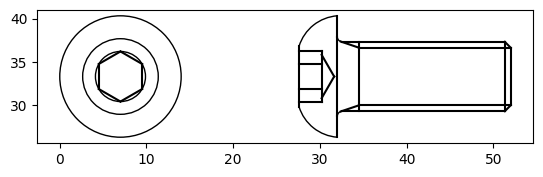

In [ ]:
# env: zumen
import ezdxf
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc

# DXFファイルのパス
dxf_file_path = '/home/kfujii/image-retrieval-transformers/assets/CADs/22_Screws_Bolts_Washers_Nuts/2d_SBCB/sbcb08-25.dxf'

# DXFファイルを読み込み
doc = ezdxf.readfile(dxf_file_path)
msp = doc.modelspace()

# 描画の準備
fig, ax = plt.subplots()

for e in msp:
    # 中心線(CENTERやMSM_CENTERレイヤー)を除外
    if e.dxf.layer != 'CENTER' and e.dxf.layer != 'MSM_CENTER':
        if e.dxftype() == 'LINE':  # 直線
            start, end = e.dxf.start, e.dxf.end
            ax.plot([start.x, end.x], [start.y, end.y], 'k')

        elif e.dxftype() == 'CIRCLE':  # 円
            center, radius = e.dxf.center, e.dxf.radius
            circle = Circle((center.x, center.y), radius, edgecolor='k', fill=False)
            ax.add_patch(circle)

        elif e.dxftype() == 'ARC':  # 弧
            center = e.dxf.center
            radius = e.dxf.radius
            start_angle = e.dxf.start_angle
            end_angle = e.dxf.end_angle
            arc = Arc((center.x, center.y), 2*radius, 2*radius, angle=0, theta1=start_angle, theta2=end_angle, edgecolor='k')
            ax.add_patch(arc)

        elif e.dxftype() == 'POLYLINE':  # ポリライン
            points = e.points()
            x_coords = [point[0] for point in points]
            y_coords = [point[1] for point in points]
            ax.plot(x_coords, y_coords, 'k')

        elif e.dxftype() == 'LWPOLYLINE':  # 軽量ポリライン
            points = e.get_points('xy')
            x_coords = [point[0] for point in points]
            y_coords = [point[1] for point in points]
            ax.plot(x_coords, y_coords, 'k')

        elif e.dxftype() == 'SPLINE':  # スプライン
            fit_points = e.fit_points
            x_coords = [point.x for point in fit_points]
            y_coords = [point.y for point in fit_points]
            ax.plot(x_coords, y_coords, 'k')

# 軸の設定
ax.set_aspect('equal')
plt.savefig('output.jpg', dpi=300)

Saved image after 0 entities
Saved image after 0 entities
Saved image after 10 entities
Saved image after 10 entities
Saved image after 20 entities
Saved image after 30 entities
Saved image after 40 entities
Saved image after 50 entities
Saved image after 60 entities
Saved image after 70 entities
Saved image after 80 entities
Saved image after 90 entities
Saved image after 100 entities
Final image saved.


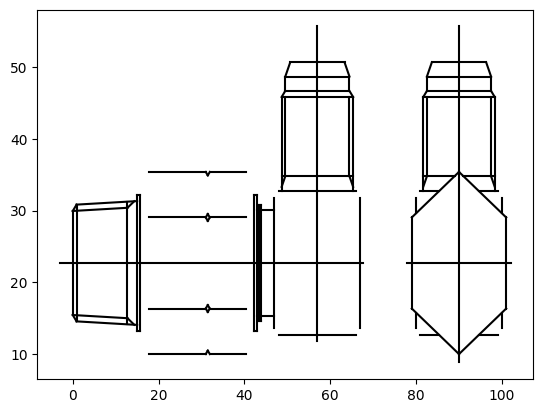

In [56]:
%matplotlib inline
import ezdxf
import matplotlib.pyplot as plt
import time

# DXFファイルのパス
dxf_file_path = '/home/kfujii/image-retrieval-transformers/assets/CADs/12_Hydraulic_Equipment/2d_KCLPFP/kclpfp3.dxf'


# 描画の準備
fig, ax = plt.subplots()

# エンティティを10個ごとに描画し、途中の結果を保存
count = 0
for i, e in enumerate(msp):
    if e.dxftype() == 'LINE':  # エンティティがLINEの場合
        start, end = e.dxf.start, e.dxf.end
        ax.plot([start.x, end.x], [start.y, end.y], 'k')  # 線を描画
        count += 1

    # 10個ごとに画像を保存
    if count % 10 == 0:
        plt.savefig(f'output_step_{count}.jpg', dpi=300)
        print(f'Saved image after {count} entities')

# 最終画像の保存
plt.savefig('final_output.jpg', dpi=300)
print('Final image saved.')

In [3]:
import os
import ezdxf
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc

# DXFファイルが保存されているフォルダと、保存先のフォルダ
input_dir = '/home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission'
output_dir = '/home/kfujii/image-retrieval-transformers/data/original/04_Rotary_Power_Transmission'

# 出力用ディレクトリの作成
def ensure_output_dir_structure(input_dir, output_dir):
    # ルート出力ディレクトリが存在しない場合は作成
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

# DXFファイルを画像に変換して保存する関数
def dxf_to_image(input_filepath, output_filepath):
    try:
        doc = ezdxf.readfile(input_filepath)
        msp = doc.modelspace()

        # 図を描画する準備
        fig, ax = plt.subplots()


        for e in msp:
            if e.dxf.layer != 'CENTER' and e.dxf.layer != 'MSM_CENTER':
                if e.dxftype() == 'VERTEX':  # VERTEXを描画
                    x, y = e.dxf.location.x, e.dxf.location.y
                    # 不要
                    # ax.plot(x, y, 'ro')  # 赤い点で頂点をプロット

                elif e.dxftype() == 'LINE':  # 直線
                    start, end = e.dxf.start, e.dxf.end
                    ax.plot([start.x, end.x], [start.y, end.y], 'k')

                elif e.dxftype() == 'CIRCLE':  # 円
                    center, radius = e.dxf.center, e.dxf.radius
                    circle = Circle((center.x, center.y), radius, edgecolor='k', fill=False)
                    ax.add_patch(circle)

                elif e.dxftype() == 'ARC':  # 弧
                    center = e.dxf.center
                    radius = e.dxf.radius
                    start_angle = e.dxf.start_angle
                    end_angle = e.dxf.end_angle
                    arc = Arc((center.x, center.y), 2 * radius, 2 * radius, angle=0, theta1=start_angle, theta2=end_angle, edgecolor='k')
                    ax.add_patch(arc)

                elif e.dxftype() == 'POLYLINE':  # ポリライン
                    points = e.points()
                    x_coords = [point[0] for point in points if len(point) > 1]
                    y_coords = [point[1] for point in points if len(point) > 1]
                    if len(x_coords) == len(y_coords) and len(x_coords) > 0:
                        ax.plot(x_coords, y_coords, 'k')

                elif e.dxftype() == 'LWPOLYLINE':  # 軽量ポリライン
                    points = e.get_points('xy')
                    x_coords = [point[0] for point in points if len(point) > 1]
                    y_coords = [point[1] for point in points if len(point) > 1]
                    if len(x_coords) == len(y_coords) and len(x_coords) > 0:
                        ax.plot(x_coords, y_coords, 'k')

                elif e.dxftype() == 'ELLIPSE':  # 楕円
                    center = e.dxf.center
                    major_axis = e.dxf.major_axis
                    ratio = e.dxf.ratio
                    angle = e.dxf.rotation
                    ellipse = Arc((center.x, center.y), width=2 * major_axis.magnitude, height=2 * major_axis.magnitude * ratio,
                                angle=angle, theta1=0, theta2=360, edgecolor='k')
                    ax.add_patch(ellipse)

                elif e.dxftype() == 'SPLINE':  # スプライン
                    fit_points = e.fit_points
                    x_coords = [point.x for point in fit_points]
                    y_coords = [point.y for point in fit_points]
                    if len(x_coords) == len(y_coords) and len(x_coords) > 0:
                        ax.plot(x_coords, y_coords, 'k')

                # elif e.dxftype() == 'INSERT':  # INSERTエンティティ
                #     insert_point = e.dxf.insert
                #     ax.plot(insert_point.x, insert_point.y, 'bo')  # 青い点でINSERT位置をプロット


        # 軸や枠線を非表示にする
        ax.set_axis_off()

        # アスペクト比を正方形に設定
        ax.set_aspect('equal')

        # 描画領域を正方形に設定
        plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

        try:
            plt.savefig(output_filepath, dpi=300, bbox_inches='tight', pad_inches=0)
        except:
            print(f'{input_filepath} でエラーが発生しています。')
        plt.close()
        plt.close()
    except Exception as e:
        print(f'Error processing {input_filepath}: {e}')

# DXFファイルを再帰的に探索して画像に変換する
def process_all_dxf_files(input_dir, output_dir):
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.lower().endswith('.dxf'):
                input_filepath = os.path.join(root, file)
                base_filename = os.path.splitext(file)[0]  # 拡張子なしのファイル名
                new_filename = base_filename + ".jpg"  # 新しいファイル名の生成
                output_filepath = os.path.join(output_dir, new_filename)

                # 画像を保存
                dxf_to_image(input_filepath, output_filepath)

# フォルダ構造を保持して出力ディレクトリを作成
ensure_output_dir_structure(input_dir, output_dir)

# DXFファイルをすべて処理
process_all_dxf_files(input_dir, output_dir)

Error processing /home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_GEAHF/geahf2_0-21-20-b-8.dxf: File '/home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_GEAHF/geahf2_0-21-20-b-8.dxf' is not a DXF file.
Error processing /home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_GEAHF/geahf2_0-23-20-b-8.dxf: File '/home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_GEAHF/geahf2_0-23-20-b-8.dxf' is not a DXF file.
Error processing /home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_GEAHF/geahf2_0-24-20-b-8.dxf: File '/home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_GEAHF/geahf2_0-24-20-b-8.dxf' is not a DXF file.
Error processing /home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_GEAHF/geahf2_0-28-20-b-8.dxf: File '/home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary

In [77]:
import os
import ezdxf

# DXFファイルが保存されているフォルダと、ログの保存先フォルダ
input_dir = '/home/kfujii/image-retrieval-transformers/assets/CADs/12_Hydraulic_Equipment'
output_dir = '/home/kfujii/image-retrieval-transformers/data/mechanical'
log_file = 'entity_log.txt'  # ログファイルの名前

# 出力用ディレクトリの作成
def ensure_output_dir_structure(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for root, dirs, files in os.walk(input_dir):
        rel_path = os.path.relpath(root, input_dir)
        new_output_dir = os.path.join(output_dir, rel_path)
        if not os.path.exists(new_output_dir):
            os.makedirs(new_output_dir)

# 特定のエンティティが存在するファイルをチェック
def check_entities(input_dir):
    entity_types = [
        '3DFACE', '3DSOLID', 'ACAD_PROXY_ENTITY', 'ATTDEF', 'ATTRIB', 'BODY', 
        'HATCH', 'HELIX', 'LEADER', 'LIGHT', 'MESH', 'MLINE', 'MLEADERSTYLE', 'MLEADER',
        'MTEXT', 'OLEFRAME', 'OLE2FRAME', 'RAY', 'REGION', 'SECTION', 'SEQEND', 'SHAPE', 'SOLID',
        'SUN', 'SURFACE', 'TABLE', 'TOLERANCE', 'TRACE', 'UNDERLAY', 'VIEWPORT', 'WIPEOUT', 'XLINE'
    ]
    found_entities = []

    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.lower().endswith('.dxf'):
                input_filepath = os.path.join(root, file)
                doc = ezdxf.readfile(input_filepath)
                msp = doc.modelspace()

                # ファイル内のエンティティをチェック
                detected_entities = set(e.dxftype().upper() for e in msp if e.dxftype().upper() in entity_types)
                if detected_entities:
                    found_entities.append((file, detected_entities))

    # 結果をファイルに書き込む
    with open(os.path.join(output_dir, log_file), 'w') as f:
        for filename, entities in found_entities:
            f.write(f"{filename}: {', '.join(entities)}\n")

# フォルダ構造を保持して出力ディレクトリを作成
ensure_output_dir_structure(input_dir, output_dir)

# エンティティチェックを実行
check_entities(input_dir)


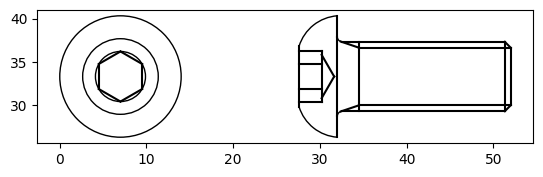

In [1]:
import ezdxf
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc

# DXFファイルのパス
dxf_file_path = '/home/kfujii/image-retrieval-transformers/assets/CADs/22_Screws_Bolts_Washers_Nuts/2d_SBCB/sbcb08-25.dxf'

# DXFファイルを読み込み
doc = ezdxf.readfile(dxf_file_path)
msp = doc.modelspace()

# 描画の準備
fig, ax = plt.subplots()

for e in msp:
    # 中心線(CENTERやMSM_CENTERレイヤー)を除外
    if e.dxf.layer != 'CENTER' and e.dxf.layer != 'MSM_CENTER':
        if e.dxftype() == 'LINE':  # 直線
            start, end = e.dxf.start, e.dxf.end
            ax.plot([start.x, end.x], [start.y, end.y], 'k')

        elif e.dxftype() == 'CIRCLE':  # 円
            center, radius = e.dxf.center, e.dxf.radius
            circle = Circle((center.x, center.y), radius, edgecolor='k', fill=False)
            ax.add_patch(circle)

        elif e.dxftype() == 'ARC':  # 弧
            center = e.dxf.center
            radius = e.dxf.radius
            start_angle = e.dxf.start_angle
            end_angle = e.dxf.end_angle
            arc = Arc((center.x, center.y), 2*radius, 2*radius, angle=0, theta1=start_angle, theta2=end_angle, edgecolor='k')
            ax.add_patch(arc)

        elif e.dxftype() == 'POLYLINE':  # ポリライン
            points = e.points()
            x_coords = [point[0] for point in points]
            y_coords = [point[1] for point in points]
            ax.plot(x_coords, y_coords, 'k')

        elif e.dxftype() == 'LWPOLYLINE':  # 軽量ポリライン
            points = e.get_points('xy')
            x_coords = [point[0] for point in points]
            y_coords = [point[1] for point in points]
            ax.plot(x_coords, y_coords, 'k')

        elif e.dxftype() == 'SPLINE':  # スプライン
            fit_points = e.fit_points
            x_coords = [point.x for point in fit_points]
            y_coords = [point.y for point in fit_points]
            ax.plot(x_coords, y_coords, 'k')

# 軸の設定
ax.set_aspect('equal')
plt.savefig('output.jpg', dpi=300)

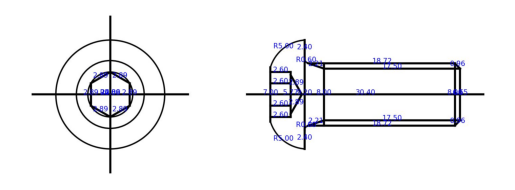

In [6]:
import ezdxf
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc
import os
from math import cos, sin, radians


def dxf_to_jpg_with_dimensions(input_dxf, output_jpg):
    # DXFファイルの読み込み
    doc = ezdxf.readfile(input_dxf)
    msp = doc.modelspace()

    # プロットの準備
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.axis('off')  # 軸は非表示にする

    # エンティティを処理してプロット
    for entity in msp:
        if entity.dxftype() == 'LINE':
            start, end = entity.dxf.start, entity.dxf.end
            ax.plot([start.x, end.x], [start.y, end.y], color='black')
            
            # 寸法の計算と表示
            length = ((end.x - start.x) ** 2 + (end.y - start.y) ** 2) ** 0.5
            mid_x, mid_y = (start.x + end.x) / 2, (start.y + end.y) / 2
            ax.text(mid_x, mid_y, f"{length:.2f}", color='blue', fontsize=5, ha='center')

        elif entity.dxftype() == 'CIRCLE':
            center, radius = entity.dxf.center, entity.dxf.radius
            circle = Circle((center.x, center.y), radius, edgecolor='black', facecolor='none')
            ax.add_patch(circle)
            
            # 半径を表示
            ax.text(center.x, center.y, f"R{radius:.2f}", color='blue', fontsize=5, ha='center')

        elif entity.dxftype() == 'ARC':
            center, radius = entity.dxf.center, entity.dxf.radius
            start_angle, end_angle = entity.dxf.start_angle, entity.dxf.end_angle
            arc = Arc((center.x, center.y), 2*radius, 2*radius,
                      theta1=start_angle, theta2=end_angle, edgecolor='black')
            ax.add_patch(arc)
            
            # 半径を表示
            mid_angle = (start_angle + end_angle) / 2
            mid_x = center.x + radius * cos(radians(mid_angle))
            mid_y = center.y + radius * sin(radians(mid_angle))
            ax.text(mid_x, mid_y, f"R{radius:.2f}", color='blue', fontsize=5, ha='center')

    # 画像として保存
    plt.savefig(output_jpg, format='jpg', bbox_inches='tight', pad_inches=0, dpi=300)
    plt.close(fig)

    # 保存した画像を表示
    img = plt.imread(output_jpg)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# 使用例
input_dxf = '/home/kfujii/image-retrieval-transformers/assets/CADs/22_Screws_Bolts_Washers_Nuts/2d_SBCB/sbcb08-25.dxf'  # 入力DXFファイルのパス
output_jpg = 'output1.jpg'  # 出力JPGファイルのパス
dxf_to_jpg_with_dimensions(input_dxf, output_jpg)


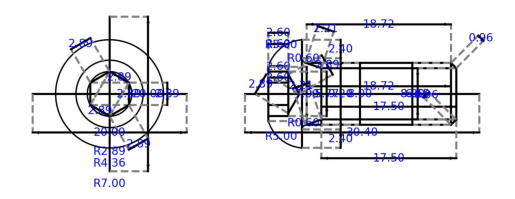

In [9]:
import ezdxf
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc, FancyArrowPatch
from math import atan2, cos, sin, radians
import os

def draw_dimension_line(ax, start, end, offset=10, text=None):
    # スタートとエンドの座標の角度と距離を計算
    angle = atan2(end.y - start.y, end.x - start.x)
    dx, dy = cos(angle), sin(angle)
    
    # 寸法線の位置をオフセット
    offset_start = (start.x + offset * -dy, start.y + offset * dx)
    offset_end = (end.x + offset * -dy, end.y + offset * dx)
    
    # 寸法補助線
    ax.plot([start.x, offset_start[0]], [start.y, offset_start[1]], color='grey', linestyle='--')
    ax.plot([end.x, offset_end[0]], [end.y, offset_end[1]], color='grey', linestyle='--')
    
    # 寸法線と矢印
    ax.plot([offset_start[0], offset_end[0]], [offset_start[1], offset_end[1]], color='black')
    arrow_size = 3
    ax.add_patch(FancyArrowPatch(offset_start, offset_end, mutation_scale=arrow_size, color="black", arrowstyle='-|>'))
    ax.add_patch(FancyArrowPatch(offset_end, offset_start, mutation_scale=arrow_size, color="black", arrowstyle='-|>'))

    # 寸法テキスト
    if text:
        mid_x = (offset_start[0] + offset_end[0]) / 2
        mid_y = (offset_start[1] + offset_end[1]) / 2
        ax.text(mid_x, mid_y, text, color='blue', fontsize=8, ha='center', va='center')

def dxf_to_jpg_with_dimension_lines(input_dxf, output_jpg):
    # DXFファイルの読み込み
    doc = ezdxf.readfile(input_dxf)
    msp = doc.modelspace()

    # プロットの準備
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.axis('off')  # 軸は非表示にする

    # エンティティを処理してプロット
    for entity in msp:
        if entity.dxftype() == 'LINE':
            start, end = entity.dxf.start, entity.dxf.end
            ax.plot([start.x, end.x], [start.y, end.y], color='black')
            
            # 長さを計算し寸法線を描画
            length = ((end.x - start.x) ** 2 + (end.y - start.y) ** 2) ** 0.5
            draw_dimension_line(ax, start, end, offset=5, text=f"{length:.2f}")

        elif entity.dxftype() == 'CIRCLE':
            center, radius = entity.dxf.center, entity.dxf.radius
            circle = Circle((center.x, center.y), radius, edgecolor='black', facecolor='none')
            ax.add_patch(circle)
            
            # 半径を表示
            ax.text(center.x, center.y - radius - 5, f"R{radius:.2f}", color='blue', fontsize=8, ha='center')

        elif entity.dxftype() == 'ARC':
            center, radius = entity.dxf.center, entity.dxf.radius
            start_angle, end_angle = entity.dxf.start_angle, entity.dxf.end_angle
            arc = Arc((center.x, center.y), 2*radius, 2*radius,
                      theta1=start_angle, theta2=end_angle, edgecolor='black')
            ax.add_patch(arc)
            
            # 弧の寸法表示
            mid_angle = (start_angle + end_angle) / 2
            mid_x = center.x + radius * cos(radians(mid_angle))
            mid_y = center.y + radius * sin(radians(mid_angle))
            ax.text(mid_x, mid_y, f"R{radius:.2f}", color='blue', fontsize=8, ha='center')

    # 画像として保存
    plt.savefig(output_jpg, format='jpg', bbox_inches='tight', pad_inches=0, dpi=300)
    plt.close(fig)

    # 保存した画像を表示
    img = plt.imread(output_jpg)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# 使用例
input_dxf = '/home/kfujii/image-retrieval-transformers/assets/CADs/22_Screws_Bolts_Washers_Nuts/2d_SBCB/sbcb08-25.dxf'  # 入力DXFファイルのパス
output_jpg = 'output1.jpg'  # 出力JPGファイルのパス
dxf_to_jpg_with_dimension_lines(input_dxf, output_jpg)


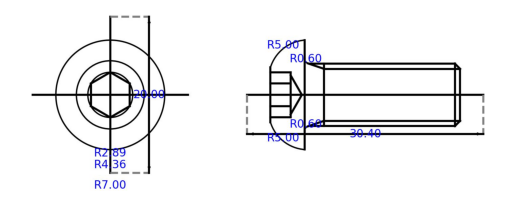

In [10]:
import ezdxf
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc, FancyArrowPatch
from math import atan2, cos, sin, radians
import os

def draw_dimension_line(ax, start, end, offset=10, text=None):
    # スタートとエンドの座標の角度と距離を計算
    angle = atan2(end.y - start.y, end.x - start.x)
    dx, dy = cos(angle), sin(angle)
    
    # 寸法線の位置をオフセット
    offset_start = (start.x + offset * -dy, start.y + offset * dx)
    offset_end = (end.x + offset * -dy, end.y + offset * dx)
    
    # 寸法補助線
    ax.plot([start.x, offset_start[0]], [start.y, offset_start[1]], color='grey', linestyle='--')
    ax.plot([end.x, offset_end[0]], [end.y, offset_end[1]], color='grey', linestyle='--')
    
    # 寸法線と矢印
    ax.plot([offset_start[0], offset_end[0]], [offset_start[1], offset_end[1]], color='black')
    arrow_size = 3
    ax.add_patch(FancyArrowPatch(offset_start, offset_end, mutation_scale=arrow_size, color="black", arrowstyle='-|>'))
    ax.add_patch(FancyArrowPatch(offset_end, offset_start, mutation_scale=arrow_size, color="black", arrowstyle='-|>'))

    # 寸法テキスト
    if text:
        mid_x = (offset_start[0] + offset_end[0]) / 2
        mid_y = (offset_start[1] + offset_end[1]) / 2
        ax.text(mid_x, mid_y, text, color='blue', fontsize=8, ha='center', va='center')

def dxf_to_jpg_with_longest_dimension_lines(input_dxf, output_jpg):
    # DXFファイルの読み込み
    doc = ezdxf.readfile(input_dxf)
    msp = doc.modelspace()

    # プロットの準備
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.axis('off')  # 軸は非表示にする

    # エンティティを処理し、縦と横の最長のラインを探す
    max_vertical_line = None
    max_horizontal_line = None
    max_vertical_length = 0
    max_horizontal_length = 0

    for entity in msp:
        if entity.dxftype() == 'LINE':
            start, end = entity.dxf.start, entity.dxf.end
            ax.plot([start.x, end.x], [start.y, end.y], color='black')

            # 線の長さを計算
            length = ((end.x - start.x) ** 2 + (end.y - start.y) ** 2) ** 0.5

            # 縦線と横線を分類し、それぞれ最長を保持
            if abs(start.x - end.x) < 1e-6:  # 縦線とみなす
                if length > max_vertical_length:
                    max_vertical_length = length
                    max_vertical_line = (start, end)
            elif abs(start.y - end.y) < 1e-6:  # 横線とみなす
                if length > max_horizontal_length:
                    max_horizontal_length = length
                    max_horizontal_line = (start, end)

        elif entity.dxftype() == 'CIRCLE':
            center, radius = entity.dxf.center, entity.dxf.radius
            circle = Circle((center.x, center.y), radius, edgecolor='black', facecolor='none')
            ax.add_patch(circle)
            
            # 半径を表示
            ax.text(center.x, center.y - radius - 5, f"R{radius:.2f}", color='blue', fontsize=8, ha='center')

        elif entity.dxftype() == 'ARC':
            center, radius = entity.dxf.center, entity.dxf.radius
            start_angle, end_angle = entity.dxf.start_angle, entity.dxf.end_angle
            arc = Arc((center.x, center.y), 2*radius, 2*radius,
                      theta1=start_angle, theta2=end_angle, edgecolor='black')
            ax.add_patch(arc)
            
            # 弧の寸法表示
            mid_angle = (start_angle + end_angle) / 2
            mid_x = center.x + radius * cos(radians(mid_angle))
            mid_y = center.y + radius * sin(radians(mid_angle))
            ax.text(mid_x, mid_y, f"R{radius:.2f}", color='blue', fontsize=8, ha='center')

    # 最長の縦線と横線について寸法線を描画
    if max_vertical_line:
        start, end = max_vertical_line
        draw_dimension_line(ax, start, end, offset=5, text=f"{max_vertical_length:.2f}")

    if max_horizontal_line:
        start, end = max_horizontal_line
        draw_dimension_line(ax, start, end, offset=5, text=f"{max_horizontal_length:.2f}")

    # 画像として保存
    plt.savefig(output_jpg, format='jpg', bbox_inches='tight', pad_inches=0, dpi=300)
    plt.close(fig)

    # 保存した画像を表示
    img = plt.imread(output_jpg)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

input_dxf = '/home/kfujii/image-retrieval-transformers/assets/CADs/22_Screws_Bolts_Washers_Nuts/2d_SBCB/sbcb08-25.dxf'  # 入力DXFファイルのパス
output_jpg = 'output1.jpg'  # 出力JPGファイルのパス
dxf_to_jpg_with_longest_dimension_lines(input_dxf, output_jpg)
